In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [2]:
# 1. 데이터 다운로드 및 로딩
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
# from datasets import load_dataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

N >	질소 비율	질소 함량 (토양 1kg당 N 함량). 식물의 성장, 잎, 줄기 발달에 필수. 과다시 도복/병해 증가 가능.

P	> 인 비율	인 함량. 뿌리 발달, 에너지 전달, 개화, 결실에 중요. 부족시 뿌리 성장 저해.

K	> 칼륨 비율	칼륨 함량. 식물의 수분 조절, 병해 저항성, 내한성. 과일 품질과 저장성에 영향.

temperature	> 온도(°C)	기온. 작물 생장, 개화, 수확, 병해 발생 등 모든 성장 단계에 매우 영향.

humidity	> 습도(%)	상대습도. 수분 공급과 증산, 병해 발생(곰팡이 등) 등과 직접적 관련.

ph	> 토양 pH	토양의 산도(산성알칼리성, 014). pH 6~7이 일반적 작물에 적합.

rainfall	> 강수량(mm)	강우량. 토양 수분 보충, 관개 필요성, 건조/침수 영향 등.

In [ ]:


url = "https://www.kaggle.com/code/prasadchaskar/crop-prediction-99-accuracy/data?select=Crop_recommendation.csv"
try:
    df = pd.read_csv(url)  # 만약 UCI 서버에 CSV가 직접 있으면
except:
    # kaggle 다운로드 필요시 업로드로 대체
    # from google.colab import files
    # uploaded = files.upload()
    # import io
    # df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

    csv_path = "./Crop_recommendation.csv"
    df = pd.read_csv(csv_path)


print(df.head())
print("컬럼:", df.columns)


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
컬럼: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
(2200, 50, 4)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

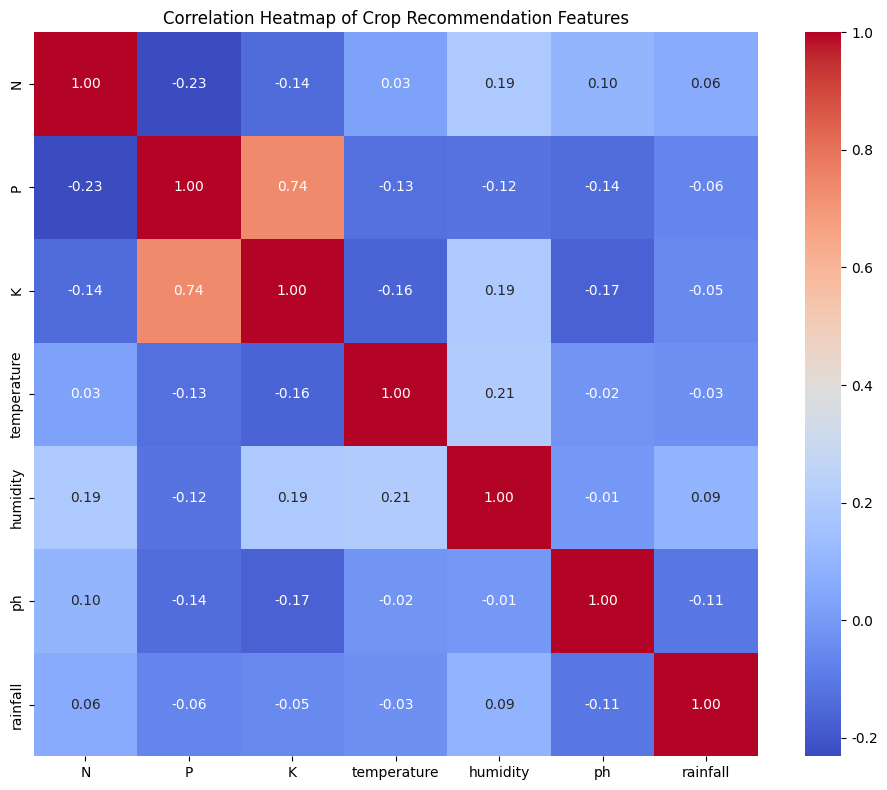

In [50]:
# 'label' 열은 문자열(작물 이름)이므로 제외하고 상관계수 계산
corr_matrix = df.drop(columns=['label']).corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Crop Recommendation Features")
plt.tight_layout()
plt.show()

In [ ]:

# 만약 Indian Crop Production 데이터면(아래 url)
# url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00358/Crop_recommendation.csv"

# 2. Season, Crop 등 범주형 처리 (여기선 Crop_recommendation.csv 기반)
from sklearn.preprocessing import LabelEncoder, StandardScaler

cat_cols = ['label'] if 'label' in df.columns else []
num_cols = [c for c in df.columns if c not in cat_cols]

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# X/y 선택 (여기선 회귀용 예시: temperature, humidity, rainfall 10일 시계열로 rainfall 예측)
n_steps = 50
def make_seq_feat(arr):
    seqs = []
    for x in arr:
        # 시계열 없으니 노이즈 추가(실데이터면 실제시계열 입력)
        seq = x + np.random.normal(0, 0.1, n_steps)
        seqs.append(seq)
    return np.array(seqs)

X_temp = make_seq_feat(df['temperature'].values)
X_hum = make_seq_feat(df['humidity'].values)
X_rain = make_seq_feat(df['rainfall'].values)
X_ph = make_seq_feat(df['ph'].values)

X = np.stack([X_temp, X_hum, X_rain, X_ph], axis=2)  # (N, n_steps, 2)
y = df['N'].values  # 실제 농작물 생산 데이터면 'Production' 등으로 대체
print(X.shape)


In [51]:
# 필요한 열만 선택
features = df[['temperature', 'humidity', 'rainfall', 'ph']].values  # shape: (N, 2)
targets = df['N'].values  # shape: (N,)

# 시계열 슬라이싱 함수
def create_sequences(features, targets, seq_len=10):
    X, y = [], []
    for i in range(len(features) - seq_len):
        X.append(features[i:i+seq_len])       # (seq_len, feature_dim)
        y.append(targets[i + seq_len])        # 1 step 미래의 rainfall
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(features, targets, seq_len=10)

print(X_seq.shape)  # → (N - seq_len, 10, 2)
print(y_seq.shape)  # → (N - seq_len,)

X = X_seq
y = y_seq

(2190, 10, 4)
(2190,)


In [59]:
df = pd.read_csv("./Crop_recommendation.csv")
X = df.drop(columns=['label', 'ph']).values
y = df['ph'].values

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("data shape", X.shape)
# LSTM 입력 형식에 맞게 reshape: (samples, seq_len=1, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))
print("data shape2", X.shape)

data shape (2200, 6)
data shape2 (2200, 1, 6)


Epoch 1: Loss=25.2515
Epoch 5: Loss=0.4661
Epoch 10: Loss=0.4348
Epoch 15: Loss=0.4194
Epoch 20: Loss=0.4140
Epoch 25: Loss=0.4133
Epoch 30: Loss=0.4007
Epoch 35: Loss=0.4001
Epoch 40: Loss=0.3957


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 

Epoch 45: Loss=0.3984
Epoch 50: Loss=0.3840


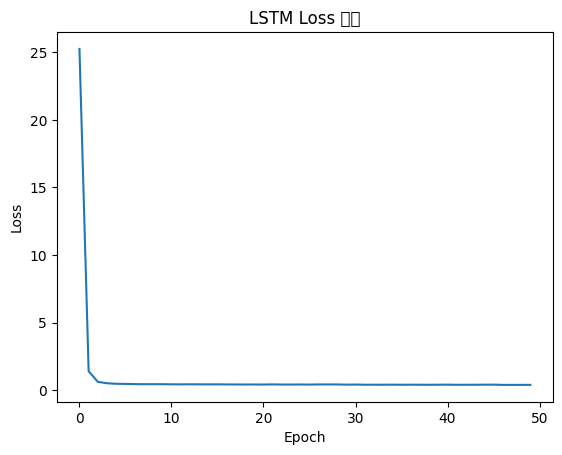

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

MSE: 0.48616941479537623
MAE: 0.47797557107650873
R2 score: 0.19132441991380666


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


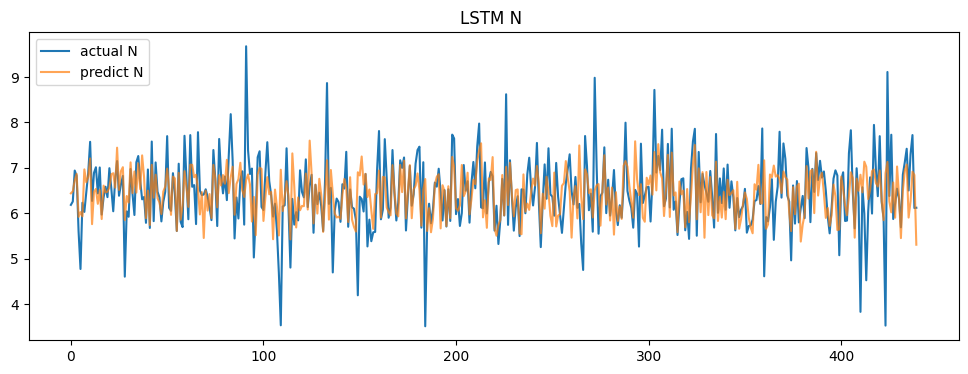

In [56]:

# print(f"{y}\n")
# train/test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PyTorch Dataset
import torch
from torch.utils.data import Dataset, DataLoader

class CropLSTMDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1,1)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = CropLSTMDataset(X_train, y_train)
test_ds = CropLSTMDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)

# LSTM 모델 정의
import torch.nn as nn

class CropLSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=32, num_layers=2):
        super().__init__()
        # self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3  # 층 사이에 Dropout 추가
        )        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:,-1,:]
        out = self.fc(out)
        
        return out

model = CropLSTMModel(input_size=X.shape[2], hidden_size=64, num_layers=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# 학습
losses = []
epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss/len(train_loader))
    if (epoch+1)%5==0 or epoch==0:
        print(f"Epoch {epoch+1}: Loss={losses[-1]:.4f}")

import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("LSTM Loss 곡선")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 평가/시각화
model.eval()
with torch.no_grad():
    y_pred = []
    for xb, yb in test_loader:
        yp = model(xb)
        y_pred.extend(yp.cpu().numpy())
    y_pred = np.array(y_pred).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

plt.figure(figsize=(12,4))
plt.plot(y_test, label="actual N")
plt.plot(y_pred, label="predict N", alpha=0.7)
plt.legend()
plt.title("LSTM N ")
plt.show()
